<a href="https://colab.research.google.com/github/bayashi-cl/statistical-learning/blob/main/lab/02_StatisticalLearning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Lab
## 2.3.1 基本コマンド

### 関数・代入

`c` 関数でベクトルを作り、それを変数 `x` に代入する。

In [ ]:
# 基本
x <- c(1, 6, 2)

# 他の手段
c(1, 4, 3) -> y
y = c(1, 4, 3)

x
y

[1] 1 6 2

[1] 1 4 3

#### 関数の定義
`関数名 <- function(引数){関数本体}`の形
返される値を`return`の後に記述する

In [ ]:
fun <- function(x){
  return (x * 2)
}
# returnがない場合は最後に評価された値が返る
a <- 5
print(fun(a))

[1] 10


#### ベクトルの長さの取得

`length` 関数を使う

In [ ]:
length(x)

[1] 3

#### 四則演算

ベクトルに対してもスカラーと同様に足し算などができる。

In [ ]:
4 + 3
x + y

[1] 7

[1]  2 10  5

#### 変数の確認・削除

現在存在する変数は `ls` 変数の削除は `rm` 関数でできる。

In [ ]:
a <- 4
ls()
rm(a)
a

[1] "a"   "fun" "x"   "y"

ERROR: ignored

In [ ]:
# lsですべての変数を取得し、それを削除
rm(list = ls())
ls()

character(0)

#### 等差数列の作成

`seq`を使う

In [ ]:
# 初項・末項を指定（公差は1）
print(seq(1, 5))
print(1:5)

# 初項・末項・項数を指定
print(seq(-pi, pi, length = 6))

[1] 1 2 3 4 5
[1] 1 2 3 4 5
[1] -3.1415927 -1.8849556 -0.6283185  0.6283185  1.8849556  3.1415927


#### 行列の作成

`matrix` 関数を使う

In [ ]:
# 1*4のベクトルを2*2の行列に変換
x <- matrix(data = c(1, 2, 3, 4), nrow = 2, ncol = 2)
# 引数名は省略できる
x <- matrix(data = c(1, 2, 3, 4), 2)
print(x)

# 変換の向きを変更する
y <- matrix(data = c(1, 2, 3, 4), 2, byrow = TRUE)
print(x)

     [,1] [,2]
[1,]    1    3
[2,]    2    4
     [,1] [,2]
[1,]    1    3
[2,]    2    4


#### 行列演算


In [ ]:
print(sqrt(x))
print(x^0.5)

print(x %*% y)

         [,1]     [,2]
[1,] 1.000000 1.732051
[2,] 1.414214 2.000000
         [,1]     [,2]
[1,] 1.000000 1.732051
[2,] 1.414214 2.000000
     [,1] [,2]
[1,]   10   14
[2,]   14   20


#### 乱数生成

`rnorm` 関数で正規分布に従う乱数を生成できる

In [ ]:
x <- rnorm(50)
y <- x + rnorm(50, mean = 50, sd = 0.1)

# ベクトル同士の共分散を計算
cor(x, y)

[1] 0.9947119

#### 乱数の固定

seedを固定することで同じ乱数が生成されるようになる。

In [ ]:
print(rnorm(5))
print(rnorm(5))
cat("\nset seed 1303\n")
set.seed(1303)
print(rnorm(5))
cat("\nset seed 1303\n")
set.seed(1303)
print(rnorm(5))
print(rnorm(5))

# 注意：同じseedから常に同じデータが生成されるのではなく、データが生成される"順番"が同じになる。

[1] -0.6334936 -0.9197179 -0.1322426 -1.2548977  0.4324153
[1] 0.6192126 1.0222131 1.5083839 0.9173127 0.8308423

set seed 1303
[1] -1.14397631  1.34212937  2.18539048  0.53639252  0.06319297

set seed 1303
[1] -1.14397631  1.34212937  2.18539048  0.53639252  0.06319297
[1]  0.5022344825 -0.0004167247  0.5658198405 -0.5725226890 -1.1102250073


#### 基本統計量の計算

それぞれ対応する関数がある

In [ ]:
set.seed(3)
x <- rnorm(100)

print("平均", quote = FALSE)
print(mean(x))
print("分散", quote = FALSE)
print(var(x))
print("標準偏差", quote = FALSE)
print(sd(x))

[1] 平均
[1] 0.01103557
[1] 分散
[1] 0.7328675
[1] 標準偏差
[1] 0.8560768


## 2.3.2 グラフの作成

データに対して`plot`関数を使う

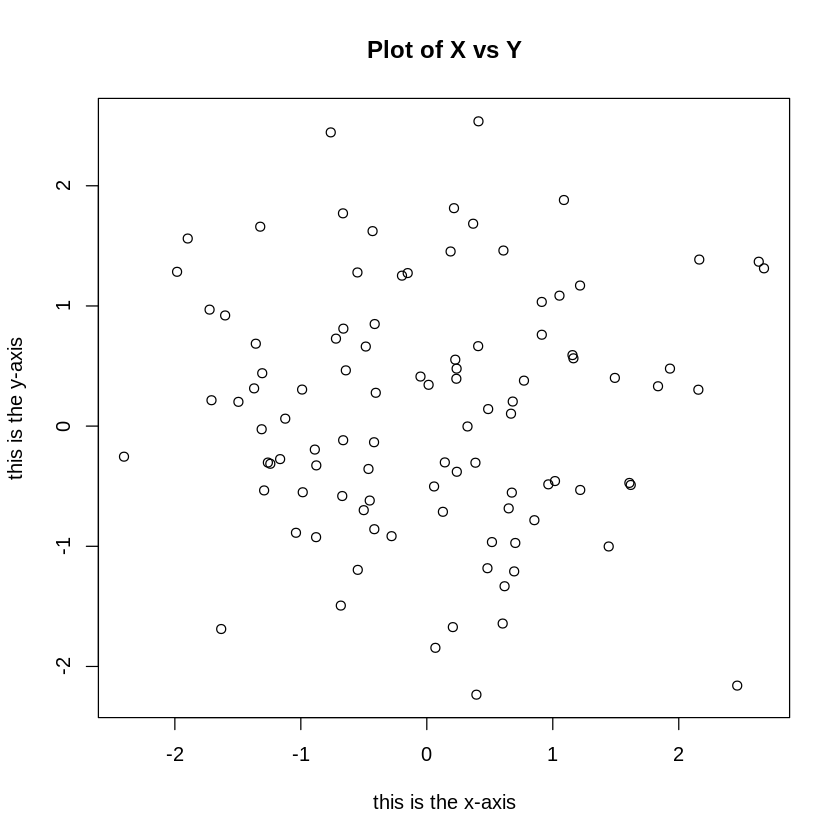

In [ ]:
x <- rnorm(100)
y <- rnorm(100)
plot(x, y, xlab = "this is the x-axis",
  ylab = "this is the y-axis",
  main = "Plot of X vs Y")

#### グラフを保存する

`pdf`関数や`jpeg`関数が使える

In [ ]:
# 描画されるファイルを開く
png("Figure.png")
# ファイルに書き込む
plot(x, y, col = "orange")
# ファイルを閉じる
dev.off()

png 
  2

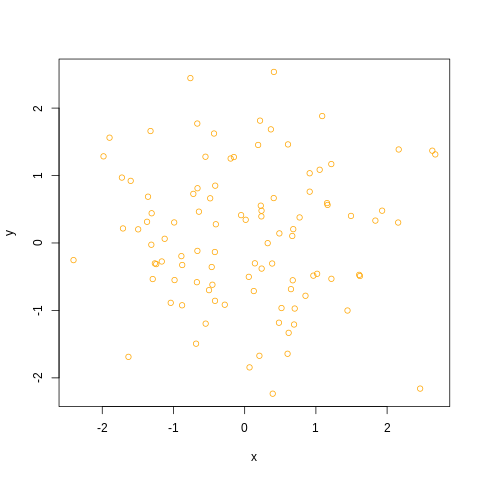

In [ ]:
IRdisplay::display_png(file = "Figure.png")

#### 等高線グラフの作成

`contour`関数を使う

引数にはグラフには
* x軸のvector
* y軸のvector
* z軸のmartix

が必要

`outer`関数は直積を計算する。第3引数に関数を指定すると、適用される関数を積から変更することができる

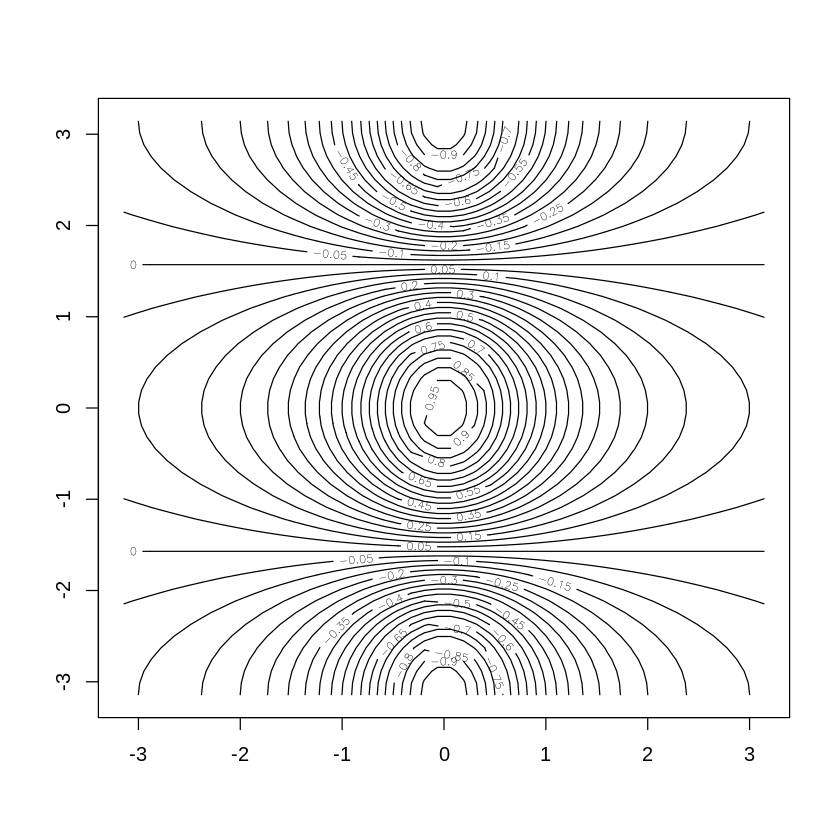

In [ ]:
fun <- function(x, y){
  return (cos(y) / (1 + x^2))
}

y <- x <- seq(-pi, pi, length = 50)
f <- outer(x, y, fun)
contour(x, y, f, nlevels = 45)

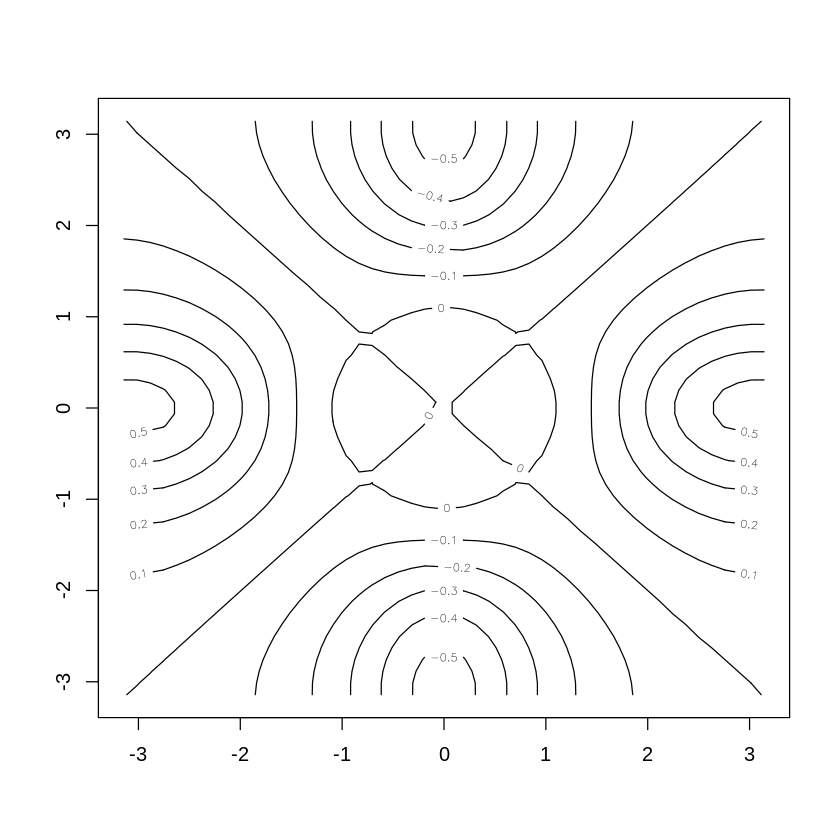

In [ ]:
# t()は行列の転置
fa <- (f - t(f)) / 2
contour(x, y, fa, nlevels = 15)

ヒートマップを作成する`image`や3dプロットをする`persp`もある

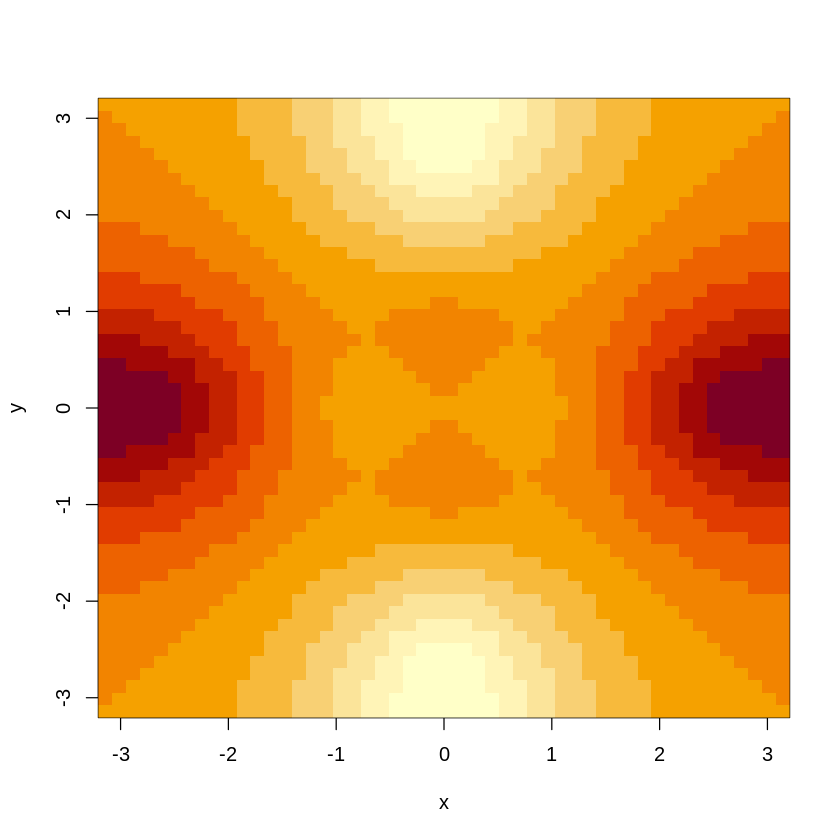

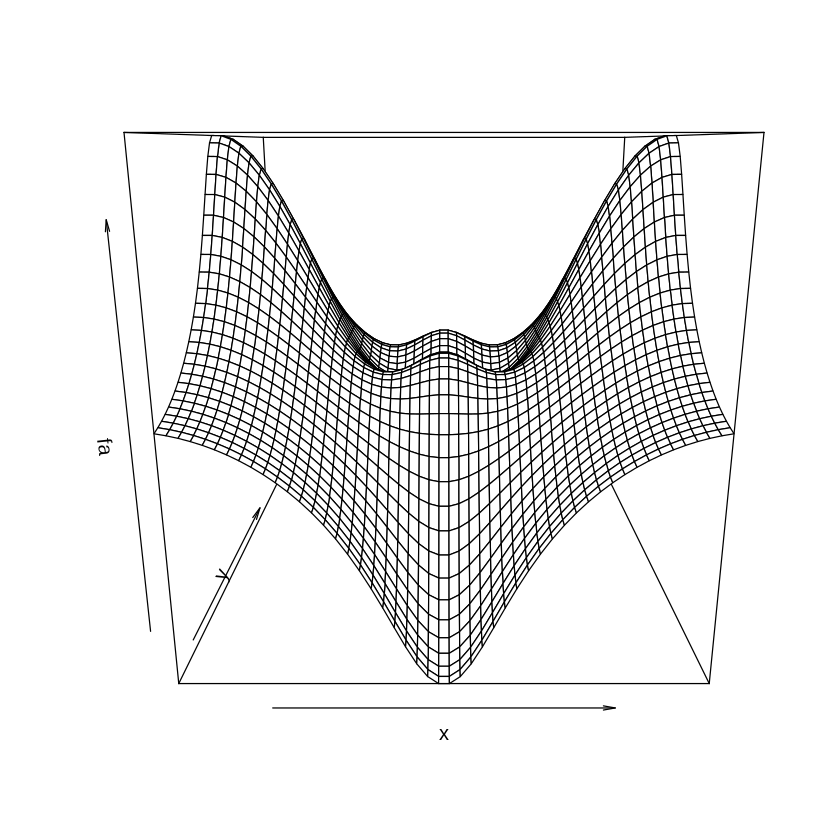

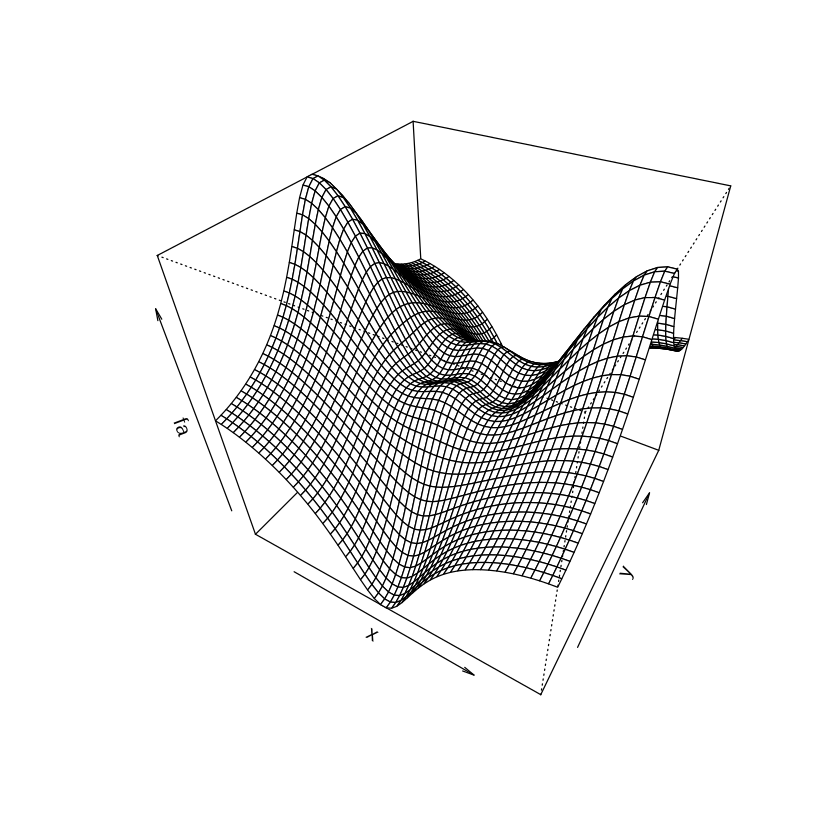

In [ ]:
image(x, y, fa)
persp(x, y, fa)
persp(x, y, fa, theta = 30, phi = 40)

### グラフ描画ライブラリの使用

標準の`plot`だと味気ない場合は`ggplot2`を使う事ができる

#### ggplot2

簡単に整ったグラフを表示できる

In [ ]:
# ライブラリのインストール
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
# ライブラリの読み込み
library(ggplot2)
library(reshape2)

ERROR: ignored

In [ ]:
# データの作成
d_norm <- data.frame(
  x = rnorm(100),
  y = rnorm(100)
)
contour_x <- seq(-pi, pi, length = 50)
contour_y <- contour_x
contour_f <- outer(contour_x, contour_y, function(a, b) cos(b) / (1 + a^2))
contour_fa <- (f - t(f)) / 2

colnames(contour_fa) <- contour_x
rownames(contour_fa) <- contour_y
d_fa <- melt(contour_fa)
colnames(d_fa) <- c("x", "y", "z")
head(d_fa)


,x,y,z
,<dbl>,<dbl>,<dbl>
1,-3.141593,-3.141593,0.000000000
2,-3.013364,-3.141593,-0.003979203
3,-2.885136,-3.141593,-0.009129591
4,-2.756908,-3.141593,-0.015497862
5,-2.628680,-3.141593,-0.023130959
6,-2.500451,-3.141593,-0.032079164


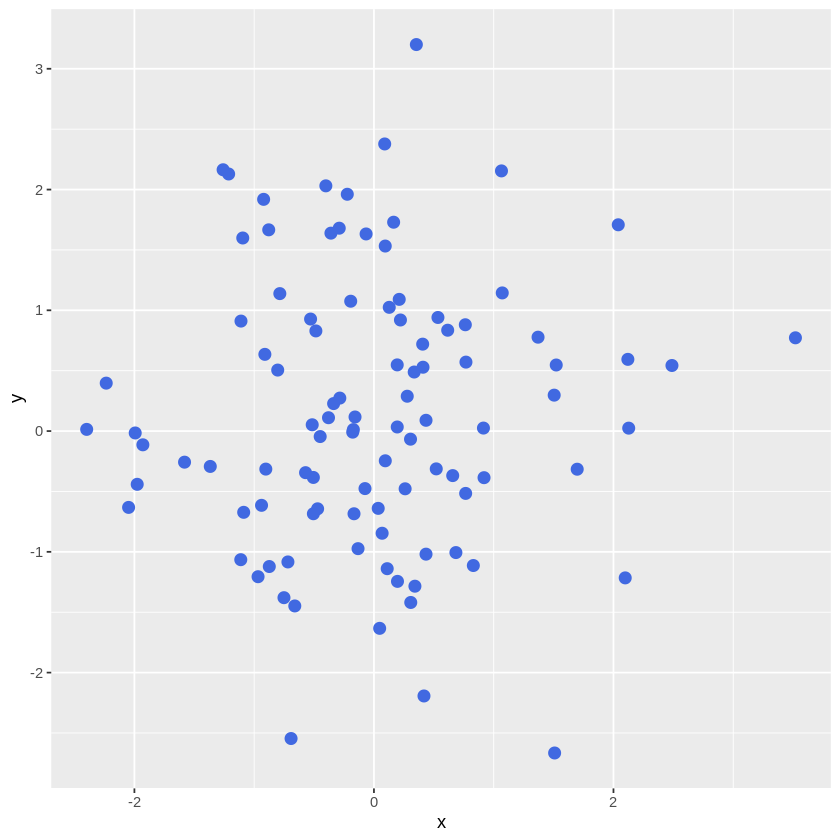

In [ ]:
# 散布図
# ggplot()で作成したグラフにgeom_point()で点を書き込むイメージ
g <- ggplot(d_norm, aes(x = x, y = y))
g <- g + geom_point(color = "royalblue", size = 3)
plot(g)

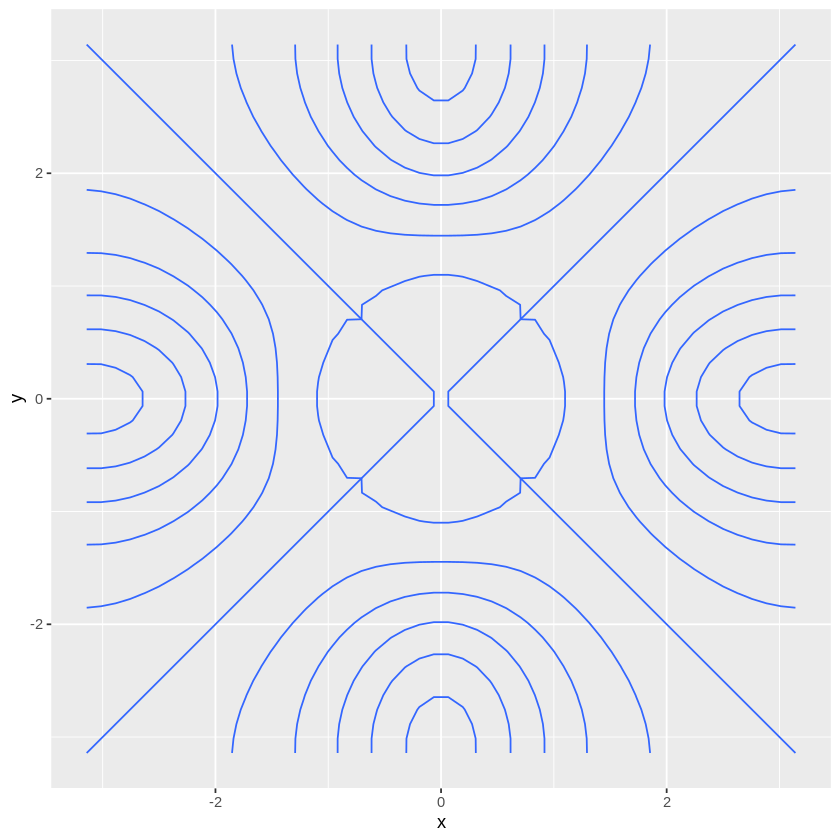

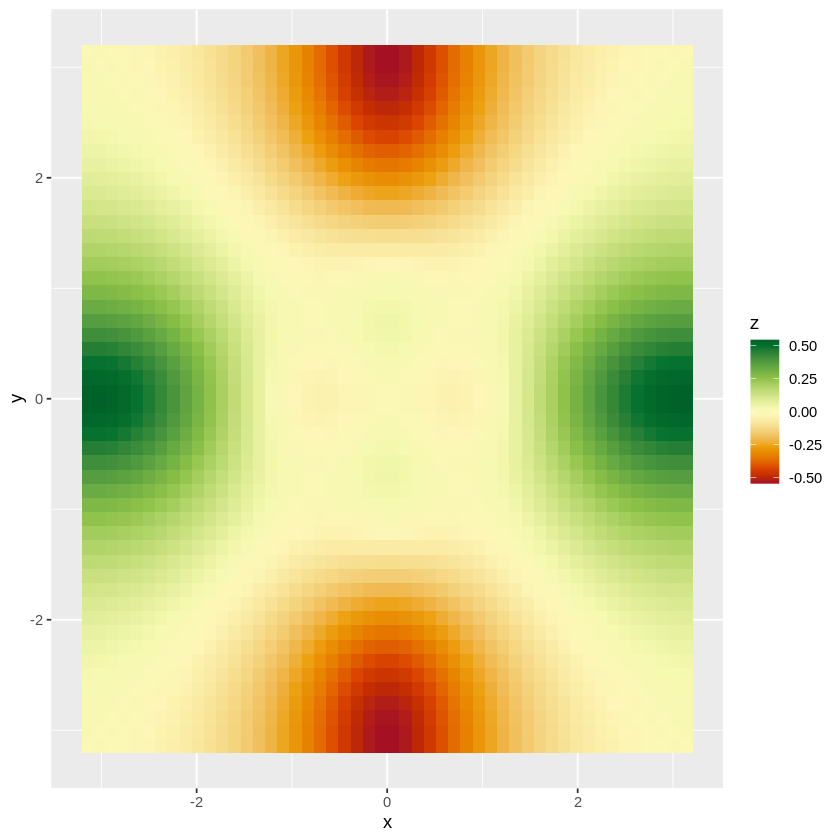

In [ ]:
# ヒートマップ・等高線
g <- ggplot(d_fa, aes(x = x, y = y))
g_cont <- g + geom_contour(aes(z = z))
g_heat <- g + geom_tile(aes(fill = z)) + 
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))
plot(g_cont)
plot(g_heat)

## 2.3.3 行列に対する操作

行列に対して、特定の行や列を抜き出すことができる。

In [2]:
# 行列作成
A <- matrix(1:16, 4)
print(A)

     [,1] [,2] [,3] [,4]
[1,]    1    5    9   13
[2,]    2    6   10   14
[3,]    3    7   11   15
[4,]    4    8   12   16


In [7]:
# 特定の要素を取り出す
print(A[2, 3])
cat("\n")

# ベクトルを渡すとその要素の行・列が抽出される
print(A[c(1, 3), c(2, 4)])
cat("\n")

# 省略するとその行・列のすべての要素が含まれる
print(1:2,)
cat("\n")

# 先頭に-をつけるとその行・列が除かれる
print(A[-c(1, 3),])
cat("\n")

# dim関数で各次元の要素数を得られる
print(dim(A))

[1] 10

     [,1] [,2]
[1,]    5   13
[2,]    7   15

[1] 1 2

     [,1] [,2] [,3] [,4]
[1,]    2    6   10   14
[2,]    4    8   12   16

[1] 4 4


## 2.3.4 データの読み込み

csvなどの形式で保存されているデータを読み込む

`na.strings = "?"`を指定することで欠損値を`?`で置き換える

`stringsAsFactors = T`を指定することで文字列を因子として扱う

`na.omit`関数で欠損値を含むデータを除外する

項目名は`names`関数で取得できる

In [20]:
# データのダウンロード
# auto_url <- "https://www.statlearning.com/s/Auto.csv"
# download.file(auto_url, "Auto.csv")
# 読み込み
Auto <- read.csv("./Auto.csv", na.strings = "?", stringsAsFactors = T)
# 直接読み込むこともできる
# Auto <- read.csv(url("https://www.statlearning.com/s/Auto.csv"), na.strings = "?", stringsAsFactors = T)

In [21]:
head(Auto)
dim(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


[1] 397   9

In [22]:
Auto <- na.omit(Auto)
dim(Auto)

[1] 392   9

In [23]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

## 2.3.5 グラフと統計量

データの各変数には`データ$変数`のようにアクセスする。

`attach`関数を使うと、データの各要素を変数として読み込める。

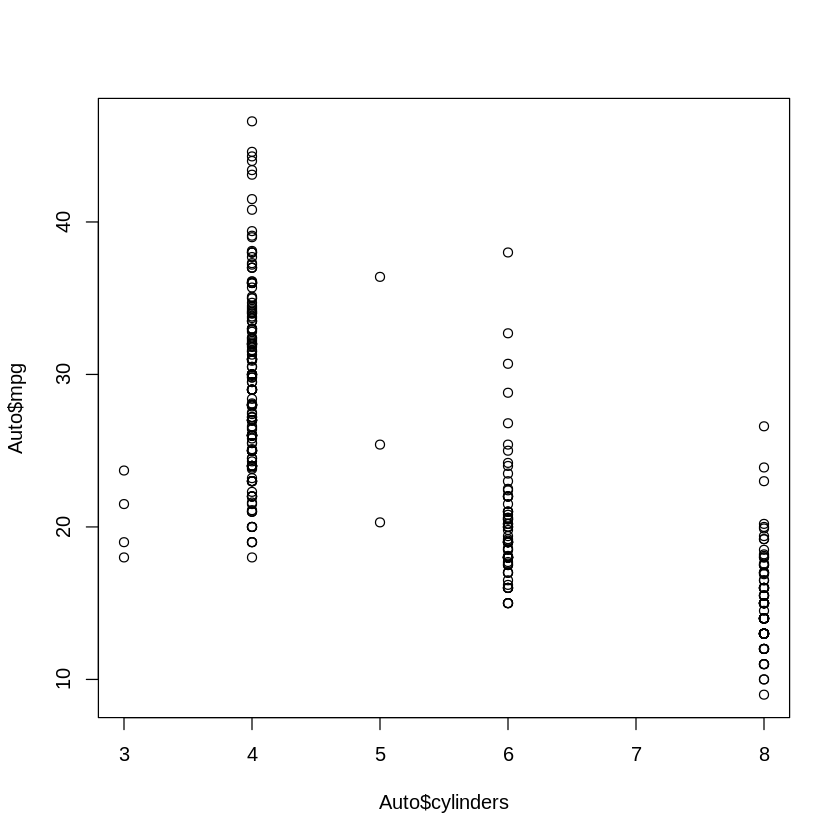

In [24]:
plot(Auto$cylinders, Auto$mpg)

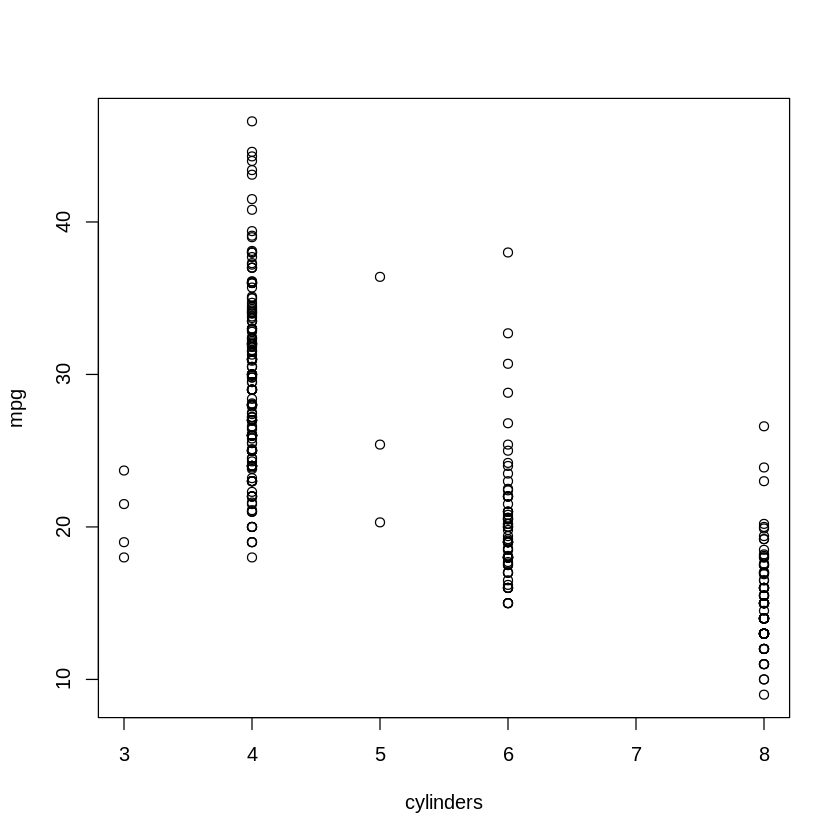

In [25]:
attach(Auto)
plot(cylinders , mpg)

データのうち、`cylinders`は取りうる値の種類が少ないため、`as.factor`関数で因子に変換する

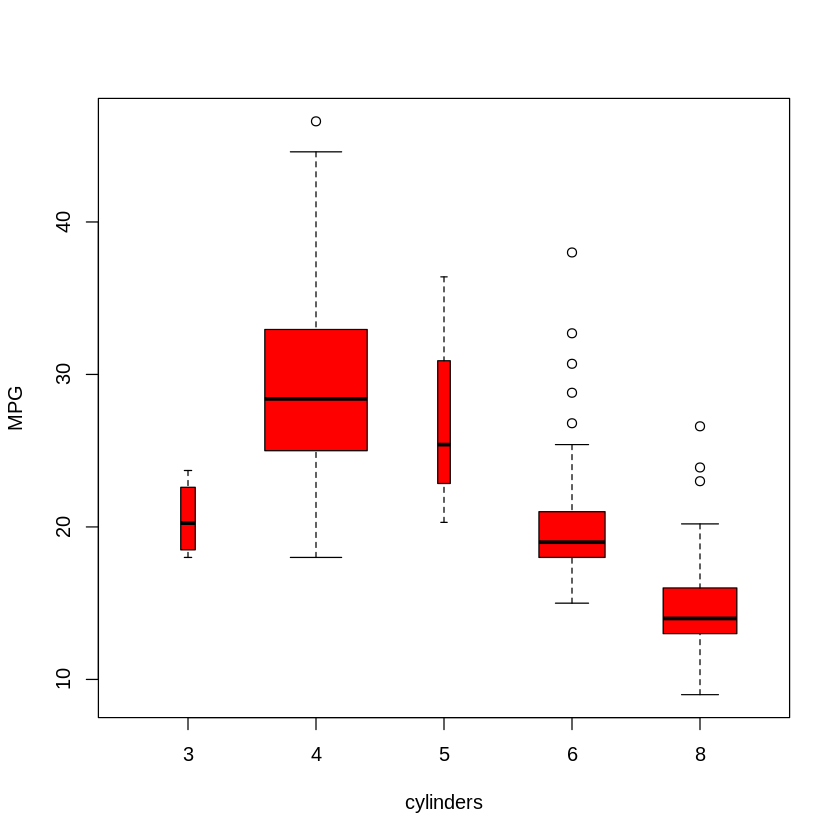

In [28]:
cylinders <- as.factor(cylinders)
plot(cylinders , mpg, col = "red", varwidth = T, xlab = "cylinders", ylab = "MPG")

`pairs`関数でいくつかの変数について散布図をまとめて書くことができる

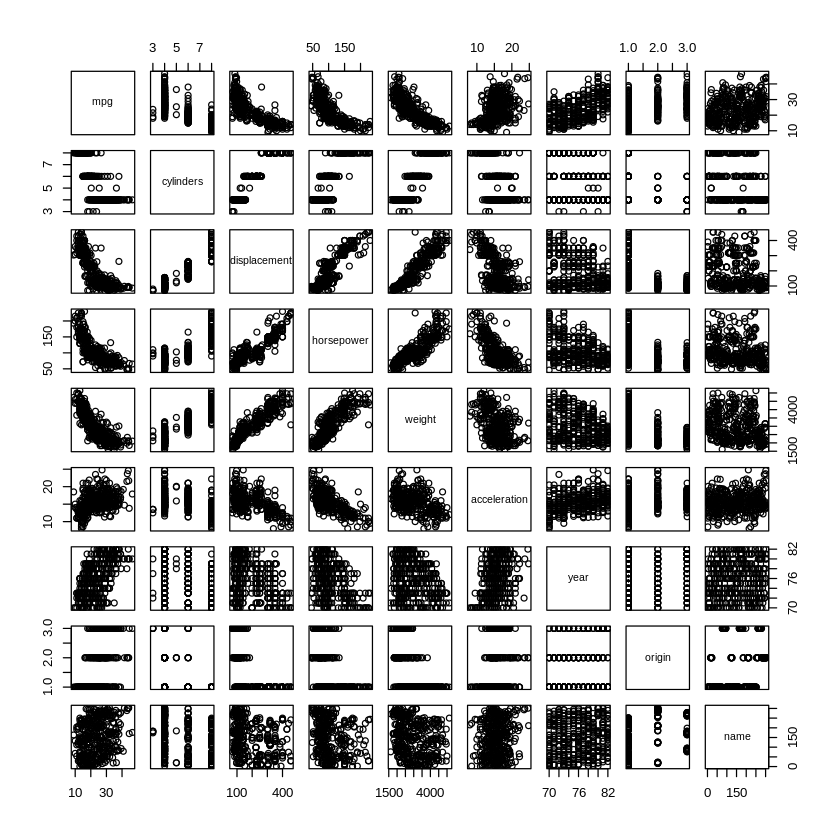

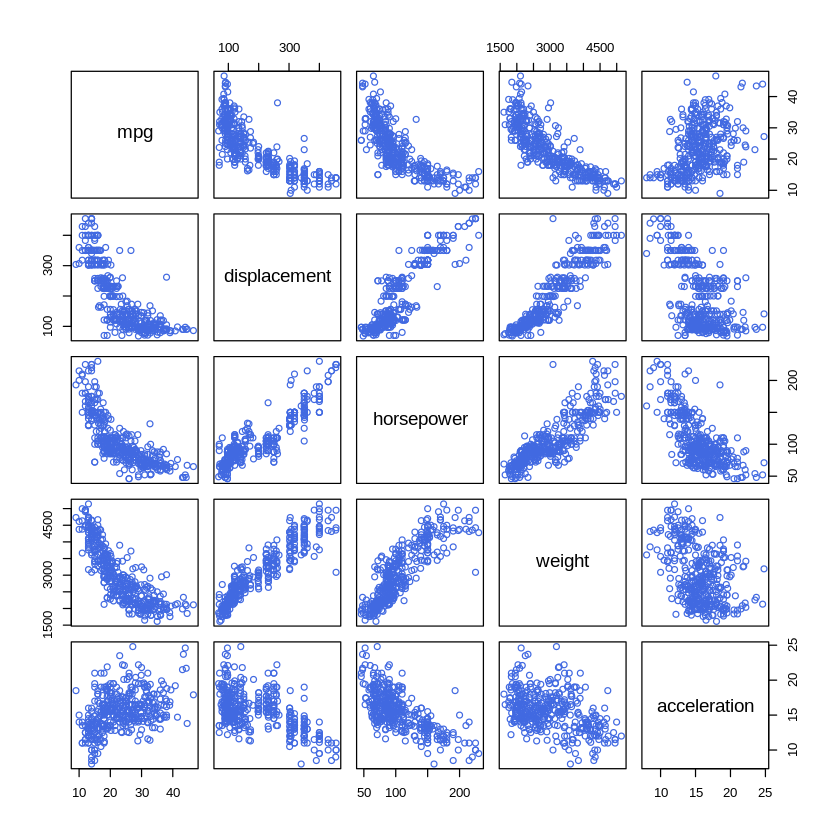

In [40]:
pairs(Auto)
pairs(
  ~ mpg + displacement + horsepower + weight + acceleration,
  data = Auto, col = "royalblue"
)

`summary`関数でデータの要約ができる。

In [43]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

# 2.4 Exercises


In [68]:
install.packages("GGally")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [69]:
library(ggplot2)
library(GGally)
library(gridExtra)

In [48]:
# 8
# (a)
college <- read.csv(url("https://www.statlearning.com/s/College.csv"), stringsAsFactors = T)
head(college)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [49]:
# (b)
# データの1列目を行タイトルとして設定する。
rownames(college) <- college[, 1]
college <- college[, -1]
head(college)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [53]:
# これでも同じ結果が得られる
college <- read.csv(url("https://www.statlearning.com/s/College.csv"),
  row.names = 1, stringsAsFactors = T
)
head(college)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [54]:
# (c)
# i
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



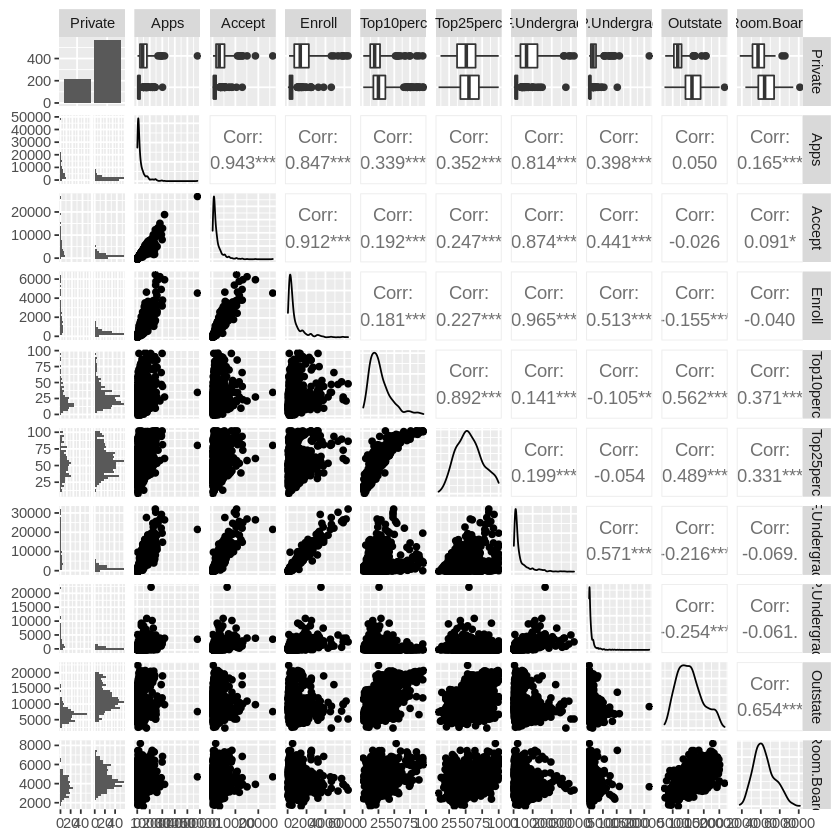

In [60]:
# ii
g <- ggpairs(college[,1:10])
g

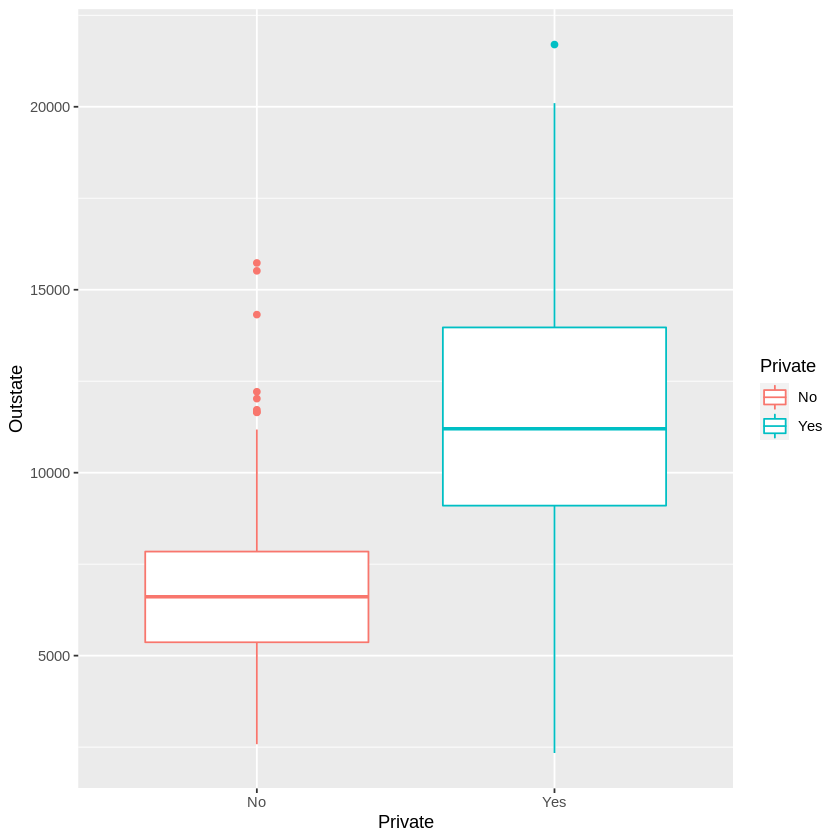

In [63]:
# iii
g <- ggplot(college, aes(x = Private, y = Outstate, color = Private))
g <- g + geom_boxplot()
g

In [64]:
# iv
# "No"のみの配列を作成
Elite <- rep("No", nrow(college))
# Top10percが50より大きいインデックスに対して"Yes"を代入
Elite[college$Top10perc > 50] <- "Yes"
# 因子化
Elite <- as.factor(Elite)
# 元のデータに結合
college <- data.frame(college , Elite)

In [67]:
summary(college$Elite)

No Yes 
699  78

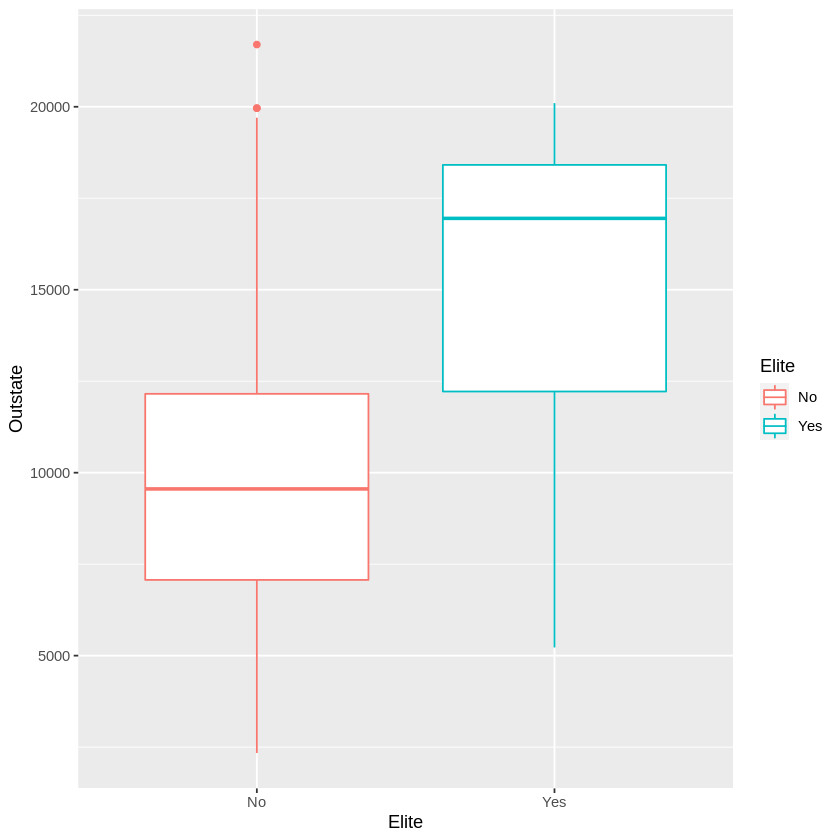

In [66]:
g <- ggplot(college, aes(x = Elite, y = Outstate, color = Elite))
g <- g + geom_boxplot()
g

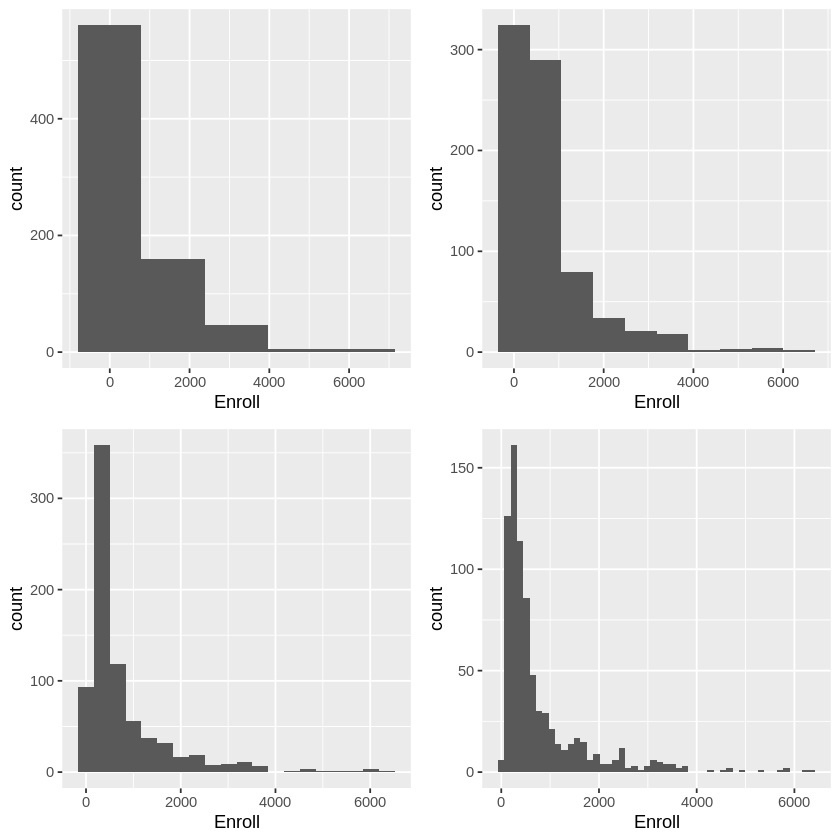

In [71]:
h <- ggplot(college, aes(x = Enroll))
h1 <- h + geom_histogram(bins = 5)
h2 <- h + geom_histogram(bins = 10)
h3 <- h + geom_histogram(bins = 20)
h4 <- h + geom_histogram(bins = 50)
grid.arrange(h1, h2, h3, h4, ncol = 2)